In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
class KMeans:

    def __init__(self, pts=-1, k=1, step_dist=0.01, max_iter=200, make_plot=True, mean_scale=100, var_scale=10):    
        # generate random points for k clusters 
        if pts == -1:
            all_pts = []
            for ki in range(k): 
                gen_var = np.random.randn(1)*var_scale
                gen_mean = np.random.randn(1)*mean_scale
                gen_pts = gen_var*np.random.randn(50, 2) + gen_mean
                all_pts.append(gen_pts)
            pts = np.concatenate(tuple(all_pts))

        self.k = k
        self.pts = pts
        self.step_dist = step_dist
        self.max_iter = max_iter
        self.make_plot = make_plot
        self.n = len(self.pts[0])
        if self.n > 3: make_plot = False
        self.k_centers = []
        self.init_k_centers = np.random.randint(low=np.min(self.pts), high= np.max(self.pts), size=(self.k, self.n))
        self.k_centers = self.init_k_centers
        self.closest_centroid_index_for_pts = []
        self.last_mean_centers_for_each_cluster = []

    def l2_norm(self, pt1, pt2):
        n1 = len(pt1)
        n2 = len(pt2)
        if n1 == n2:
            total_dist = 0
            for i in range(n1):
                total_dist += (pt1[i] - pt2[i])**2      
            return total_dist**0.5
        else: print(f'Point size mismatch: {n1} != {n2}')

    def calc_centers(self, update=True):
        ''' current closest center for each point '''
        this_closest_centroid_index_for_pts = []
        for pt in self.pts:
            dists = []
            for kcenter in self.k_centers:
                dist = self.l2_norm(pt, kcenter)
                dists.append(dist)
            this_closest_centroid_index_for_pts.append(np.argmin(dists))

        if update:
            self.closest_centroid_index_for_pts = this_closest_centroid_index_for_pts

    def step(self):
        # get mean center of every pts in each cluster
        mean_centers_for_each_cluster = []
        for ki in range(self.k):
            pts_in_k = []
            for idx, pt in enumerate(self.pts):
                if ki == self.closest_centroid_index_for_pts[idx]:
                    pts_in_k.append(pt)

            # check if cluster has at least 1 point
            if pts_in_k == []: 
                # assign a single random pt
                random_pt_id = np.random.choice(len(self.pts))
                pts_in_k.append(self.pts[random_pt_id])

            ki_center = np.average(pts_in_k, axis=0)
            mean_centers_for_each_cluster.append(ki_center)
        self.last_mean_centers_for_each_cluster = mean_centers_for_each_cluster
            
        # move each cluster center towards that by self.step_dist
        for idx, k_center in enumerate(self.k_centers):
            mean_center_at_k = mean_centers_for_each_cluster[idx]
            if len(k_center) == len(mean_center_at_k):
                for dim in range(len(k_center)):
                    if k_center[dim] > mean_center_at_k[dim]: k_center[dim] -= self.step_dist
                    else: k_center[dim] += self.step_dist

            else: print(f'something\'s up with step function: size mismatch')

    def plot_old(self, title=False):
        ''' only supports 2D scatter plots '''
        xs = self.pts[:, 0]
        ys = self.pts[:, 1]
        plt.scatter(xs, ys, label='points')

        xs = self.k_centers[:, 0]
        ys = self.k_centers[:, 0]
        plt.scatter(xs, ys, label='centroids', marker='x')
        if not title: title = f'KMeans using {self.k}-centroids'
        if title: plt.title(title)
        plt.legend()      
  
    def plot(self, title = False):
        ''' only supports 2D scatter plots '''
              
        # closest_centroid_index_for_pts
        for ki in range(self.k):
            pts_k_x, pts_k_y = [], []
            for idx, pt in enumerate(self.pts):
                if self.closest_centroid_index_for_pts[idx] == ki: 
                    pts_k_x.append(pt[0])
                    pts_k_y.append(pt[1])

            plt.scatter(pts_k_x, pts_k_y, label=f'cluster-{ki}')
            
        if not title: title = f'KMeans using {self.k}-centroids'
        plt.legend()
        
        # return plt.gcf()
        
    def train(self):
        self.calc_centers()
        i = self.max_iter
        # clustering_plots = []
        while i >= 0:
            if i%50==0: print(f'Taking step-{self.max_iter-i}...')
            self.step()
            # saving clustering plot snapshots
            # if self.make_plot and i%50==0: 
            #     image = self.plot()
            #     clustering_plots.append(image)

            i-=1
        # if self.make_plot: imageio.mimsave('clustering_plots.gif', clustering_plots)

Taking step-0...
Taking step-50...
Taking step-100...
Taking step-150...
Taking step-200...
Taking step-250...
Taking step-300...
Taking step-350...
Taking step-400...
Taking step-450...
Taking step-500...
Taking step-550...
Taking step-600...
Taking step-650...
Taking step-700...
Taking step-750...
Taking step-800...
Taking step-850...
Taking step-900...
Taking step-950...
Taking step-1000...
Taking step-1050...
Taking step-1100...
Taking step-1150...
Taking step-1200...
Taking step-1250...
Taking step-1300...
Taking step-1350...
Taking step-1400...
Taking step-1450...
Taking step-1500...
Taking step-1550...
Taking step-1600...
Taking step-1650...
Taking step-1700...
Taking step-1750...
Taking step-1800...
Taking step-1850...
Taking step-1900...
Taking step-1950...
Taking step-2000...
Taking step-2050...
Taking step-2100...
Taking step-2150...
Taking step-2200...
Taking step-2250...
Taking step-2300...
Taking step-2350...
Taking step-2400...
Taking step-2450...
Taking step-2500...
Tak

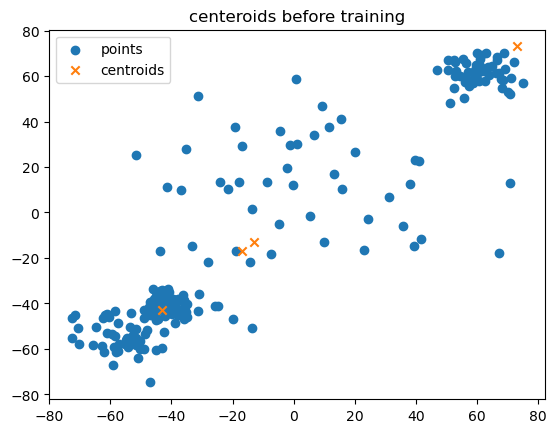

In [3]:
model = KMeans(k=4, step_dist=2, max_iter=5000)
model.plot_old('centeroids before training')
model.train()

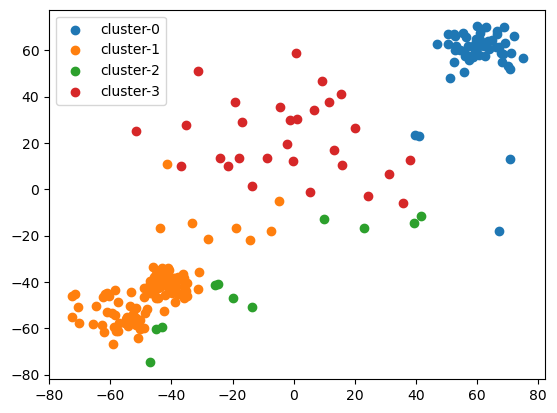

In [4]:
model.plot('centroids after training')